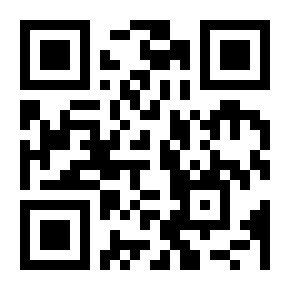

# https://url.kr/llf985

광고가 뜨더라도 제가 넣은 거 아님니다;;


참고문헌

https://islp.readthedocs.io/en/latest/labs/Ch09-svm-lab.html

https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html




## Support Vector Machine ##

recap

무언가를 분류하기 위한 방법

초평면을 찾자!

지금 앉아있는 그 상태에서 여자와 남자를 완벽하게 분리해 내는 선형 초평면을 찾을 수 있는가?
* 그래도 분류하고 싶다면?
    * 조금의 오차를 허용하는 방법
    * 오차 싫어!!!!!! 분류해줘!!!!! 방법

In [1]:
!pip install ISLP

import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 56.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 22.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 48.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 52.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 41.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

# SVM 선형경계의 쉬운 경우: Linearly Separable case!

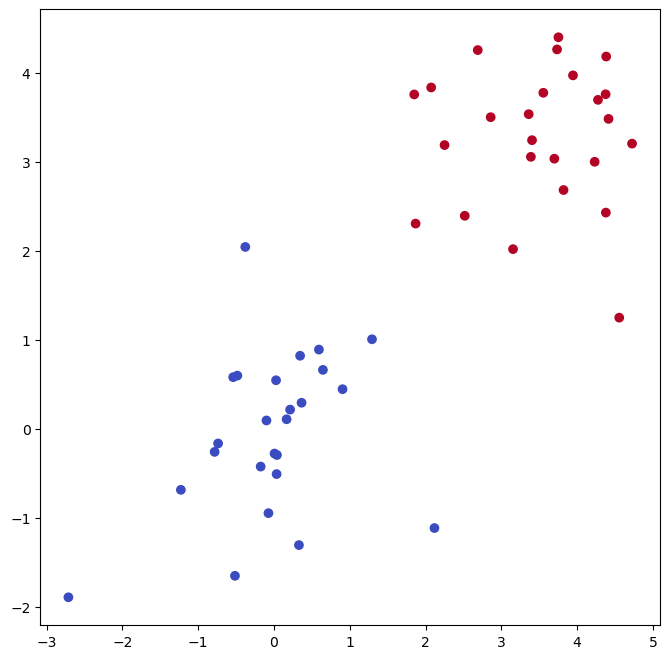

In [3]:
# 시드 고정을 한거에요 1번으로
rng = np.random.default_rng(1)

# 평균이 0이고 표준편차가 1인 정규분포를 따르는 랜덤넘버 50개를 생성하여 2개의 열을 가진 배열 X를 만듭니다.
# X는 50개의 데이터 포인트를 가지며, 각 데이터 포인트는 2차원 공간에서의 좌표를 나타냅니다.
X = rng.standard_normal((50, 2))

# 25개의 -1과 25개의 1로 이루어진 배열 y를 만듭니다.
# y는 각 데이터 포인트에 대한 레이블을 나타냅니다.
y = np.array([-1]*25+[1]*25)

X[y==1] += 3.5

fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],X[:,1], c=y, cmap=cm.coolwarm);

## 선그리기 쉽네

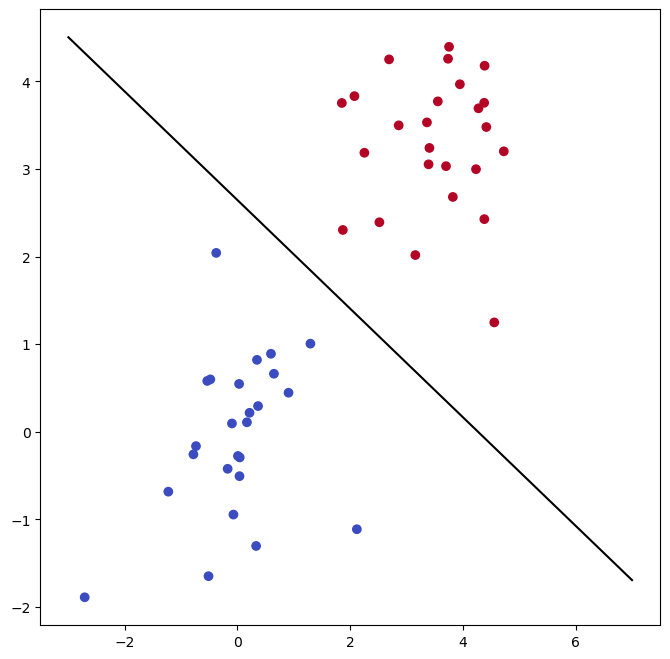

In [4]:
# 시드 고정
rng = np.random.default_rng(1)

# 데이터 생성
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 3.5

# 모델 학습
model = SVC(kernel='linear')
model.fit(X, y)

# Decision boundary 계산
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 7)
yy = a * xx - (model.intercept_[0]) / w[1]

# 표 생성
#print("Decision Boundary:")
#print("-" * 20)
#print(" x  |  y")
#print("-" * 20)
#for i in range(len(xx)):
#    print(f"{xx[i]:.2f} | {yy[i]:.2f}")

# 시각화
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm)
ax.plot(xx, yy, 'k-')  # Decision boundary 그리기
plt.show()

~인생은 이렇게 쉽지 않습니다.~

# SVM (선형 경계)  조금 힘든 경우: Linearly Non-separable case
* Linear decision boundary를 이용해서 완벽하게 나누는 것은 불가능함.
* 그래서 Error를 허용할 거임.

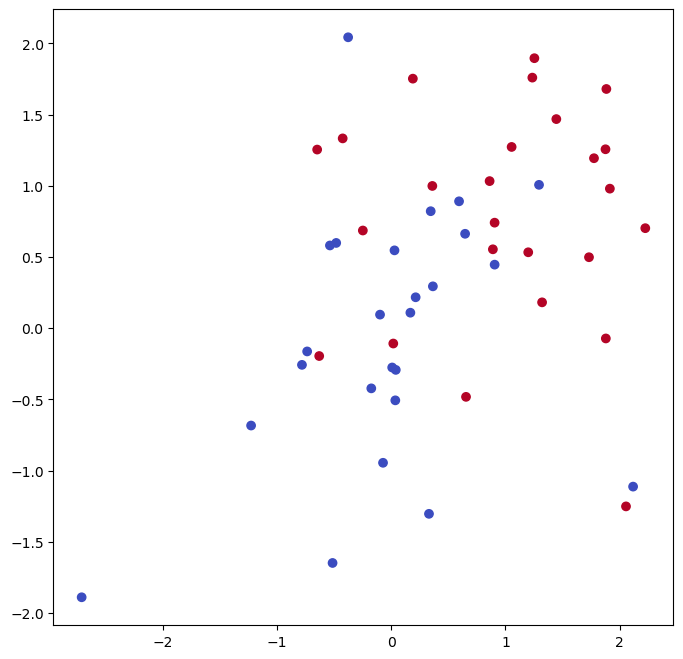

In [5]:
# 시드 고정을 한거에요 1번으로
rng = np.random.default_rng(1)

# 평균이 0이고 표준편차가 1인 정규분포를 따르는 랜덤넘버 50개를 생성하여 2개의 열을 가진 배열 X를 만듭니다.
# X는 50개의 데이터 포인트를 가지며, 각 데이터 포인트는 2차원 공간에서의 좌표를 나타냅니다.
X = rng.standard_normal((50, 2))

# 25개의 -1과 25개의 1로 이루어진 배열 y를 만듭니다.
# y는 각 데이터 포인트에 대한 레이블을 나타냅니다.
y = np.array([-1]*25+[1]*25)

# y가 1인 데이터 포인트의 X좌표값에 1을 더합니다.
# 이는 두 그룹의 데이터 포인트를 시각적으로 분리하기 위해 X축 방향으로 이동시킨것...
X[y==1] += 1

fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],X[:,1], c=y, cmap=cm.coolwarm);

In [6]:
# 선형 커널을 사용하는 SVM 모델을 생성합니다. C는 규제 매개변수로, 값이 클수록 오분류를 허용하지 않으려는 경향이 강해집니다.
svm_linear =  SVC(C=10, kernel='linear')
svm_linear.fit(X,y)

SVC(C=10, kernel='linear')

제가 생각하는 SVM에서는 두 가지 목표가 있어요.
* 하나는 최대 마진이 가장 큰 초평면이고,
* 다른 하나는 가능한 한 많은 인스턴스를 올바르게 분리하는 초평면입니다.


**문제**는 항상 두 가지를 모두 얻을 수는 없다는 건데...
* 이제부터 다룰 c 매개변수로 조절 할겁니다.

이를 설명하기 위해 아래에 예시를 그려주셨습니다.
* 우선은 C가 10일 때를 그려볼꺼구요
* 그 다음 C가 0.1일 때를 그려보겠습니다.

## 결과 그래픽화 (넘나드는 것을 크게 허용)


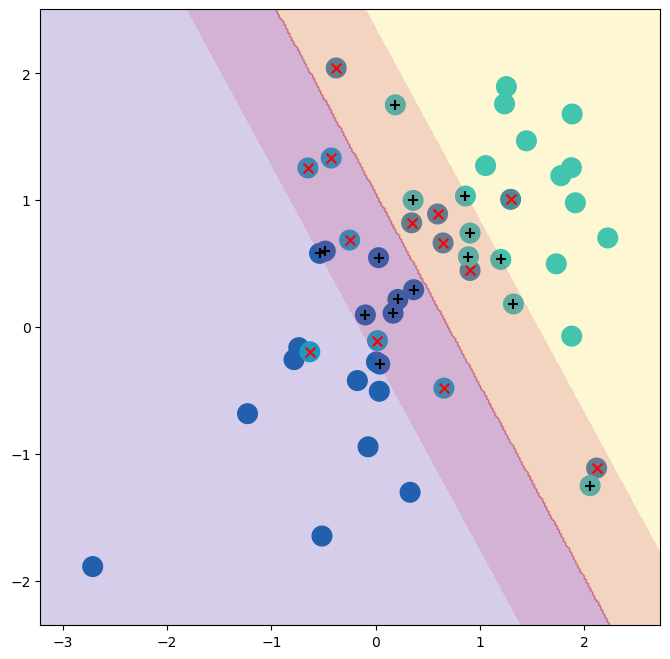

In [7]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,y, svm_linear , ax=ax)

##  결과 그래픽화 (넘나드는 것을 다소 적게 허용)


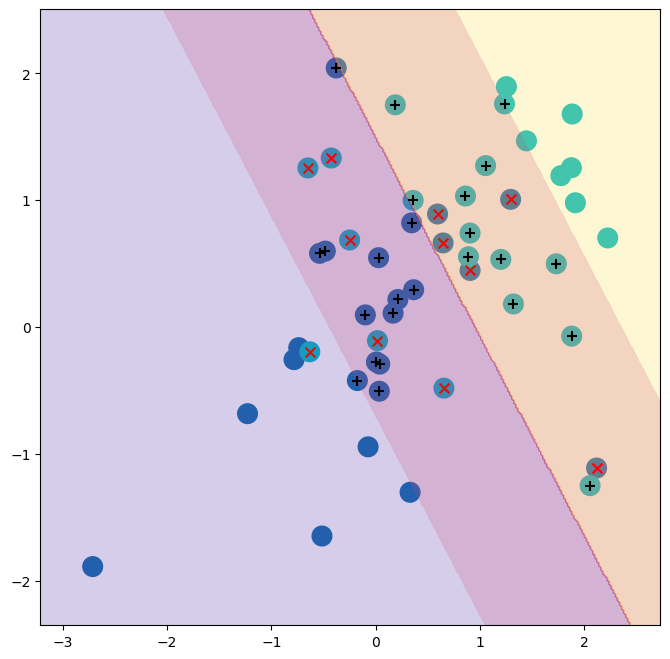

In [8]:
# 선형 커널을 사용하는 SVM 모델을 생성합니다.
# C는 규제 매개변수로, 이전 모델보다 작은 값(0.1)을 사용합니다.
# C 값이 작을수록 모델은 더 큰 마진을 허용하며, 오분류에 덜 민감해집니다.
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,y, svm_linear_small , ax=ax)

> 포스터에 마진에 대한 비교같은 게 들어가면 좋겠다? SVM을 어케씀

## 비교

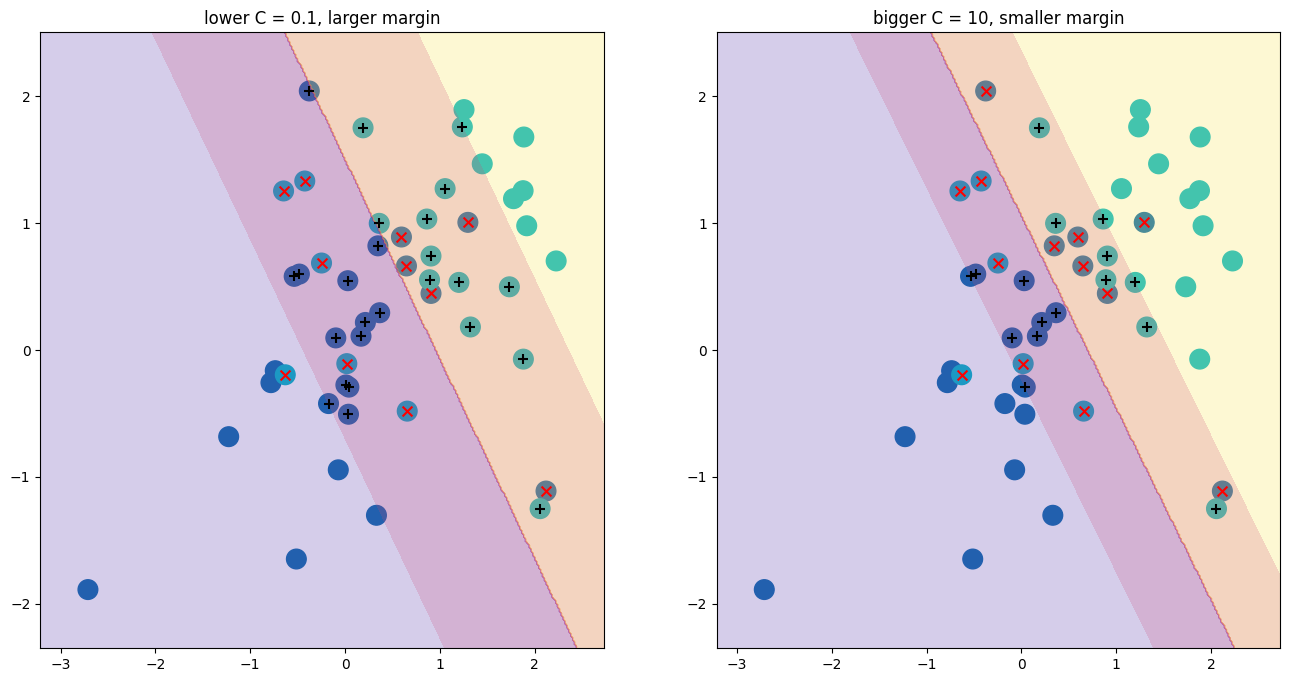

In [ ]:
# 1행 2열의 subplot 생성
fig, ax = subplots(1, 2, figsize=(16,8))

# 첫 번째 subplot에 svm_linear_small 모델 출력
plot_svm(X, y, svm_linear_small, ax=ax[0])
ax[0].set_title("lower C = 0.1, larger margin")

# 두 번째 subplot에 svm_linear 모델 출력
plot_svm(X, y, svm_linear, ax=ax[1])
ax[1].set_title("bigger C = 10, smaller margin")

plt.show()

왼쪽 그림 C가 작음, 마진이 커짐,   
오른쪽 그림 C를 키움, 마진이 작아짐,

In [ ]:
# 모델의 계수를 반환하는 함수임
# 결정 경계를 정의하는 데 사용되는 가중치임
svm_linear.coef_

array([[1.17303943, 0.77348227]])

작은 C 값 (왼쪽): 모델은 더 큰 마진을 허용하며, 몇 개의 오분류를 허용하더라도 일반화 성능을 높이는 데 집중.
* 따라서 결정 경계는 데이터 포인트에서 더 멀리 떨어져 있고 마진이 커짐.

큰 C 값 (오른쪽): 모델은 오분류를 최소화하는 데 집중.
* 따라서 결정 경계는 데이터 포인트에 더 가깝게 형성되고 마진이 작아짐.
* 이는 과적합(overfitting)으로 이어질 수도 있음.

**목표: 마진 (M) 최대화**

SVM은 데이터 포인트들을 두 개의 클래스로 나누는 **결정 경계**를 찾는 알고리즘.
* 이때 결정 경계와 가장 가까운 데이터 포인트들 사이의 거리를 **마진(margin)** 이라고 함.
* SVM은 이 마진을 최대화하는 결정 경계를 찾는 것을 목표로 함.

**결정 경계:**

*  결정 경계는 $ \beta_0 + \beta_1 x_{i1} + ... + \beta_p x_{ip} = 0 $  형태의 선형 방정식으로 표현됨.
   *  $x_{i1}, ..., x_{ip}$ 는 i번째 데이터 포인트의 특징(feature) 값들을 의미합니다.
   *  $\beta_0, \beta_1, ..., \beta_p$ 는 결정 경계를 정의하는 계수들입니다.

**제약 조건:**

1. **$\sum_{j=1}^{p}\beta_{j}^{2}=1$**: 이 조건은 계수들의 크기를 제한하여 모델의 복잡도를 줄이는 역할을 합니다.

2. **$y_{i}(\beta_{0}+\beta_{1}x_{i1}+\cdot\cdot\cdot+\beta_{p}x_{ip})>M(1-\epsilon_{i})$**:  이 조건은 각 데이터 포인트가 마진 바깥쪽에 위치하도록 강제합니다.
   * $y_i$는 i번째 데이터 포인트의 클래스 레이블 (+1 또는 -1)입니다.
   *  $M$은 마진의 크기입니다.
   * $\epsilon_i$는 **슬랙 변수(slack variable)** 로,  데이터 포인트가 마진 안쪽이나 반대쪽에 위치할 경우 허용되는 정도를 나타냅니다.

3. **$\epsilon_{i}>0$, $\sum_{i=1}^{n}\epsilon_{i}\le C$**: 이 조건은 슬랙 변수의 값을 제한합니다.
   *  모든 슬랙 변수는 0보다 커야 합니다.
   *  슬랙 변수의 합은 C 이하여야 합니다.
   *  **C는 튜닝 파라미터**로, 오분류를 허용하는 정도를 조절합니다. C 값이 클수록 오분류를 허용하지 않으려는 경향이 강해집니다.

**요약:**

SVM은 마진을 최대화하면서, 가능한 한 많은 데이터 포인트를 마진 바깥쪽에 위치시키도록 학습합니다.
* 슬랙 변수와 튜닝 파라미터 C를 사용하여 오분류를 허용하는 정도를 조절하고, 모델의 복잡도를 제어합니다.

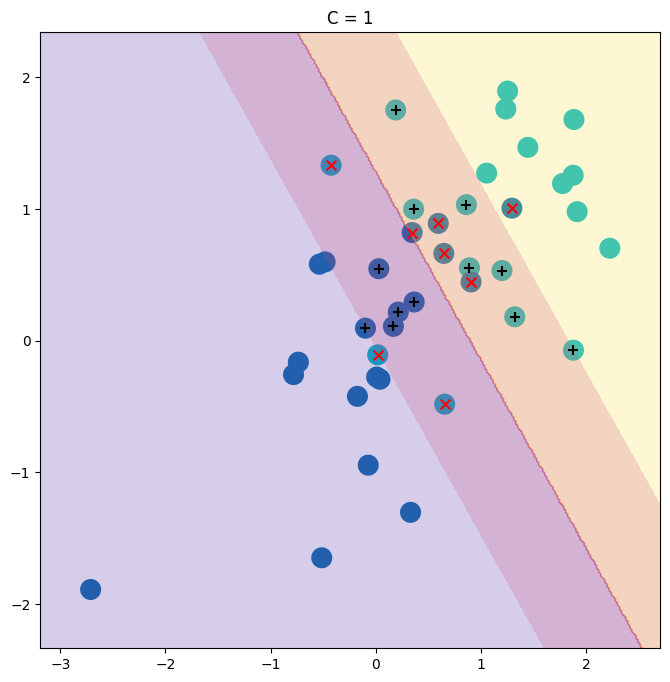

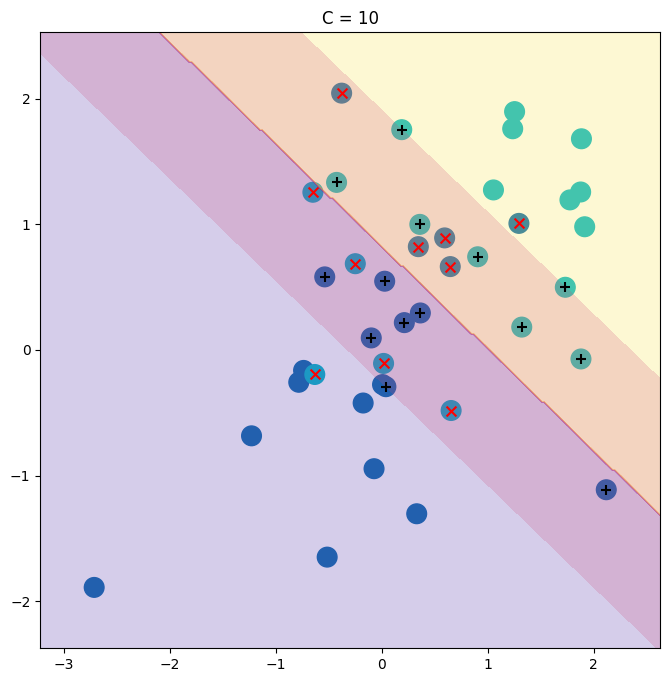

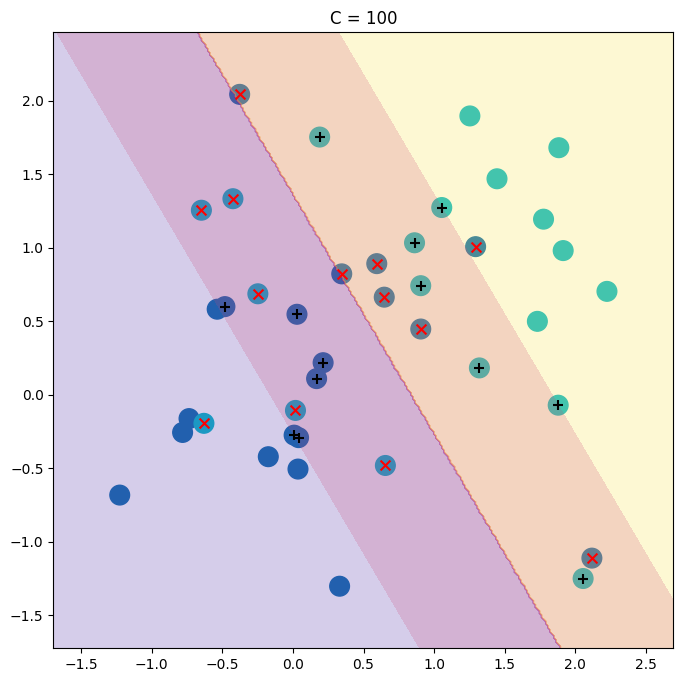

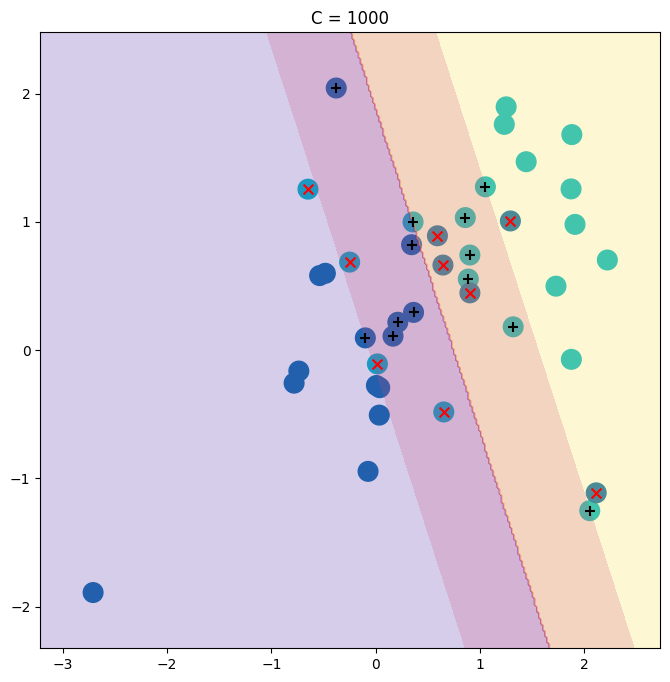

C = 1.0: Bias = 0.2850, Variance = 0.0223, Accuracy = 0.7150
C = 10.0: Bias = 0.2710, Variance = 0.0179, Accuracy = 0.7290
C = 100.0: Bias = 0.2890, Variance = 0.0180, Accuracy = 0.7110
C = 1000.0: Bias = 0.2670, Variance = 0.0192, Accuracy = 0.7330


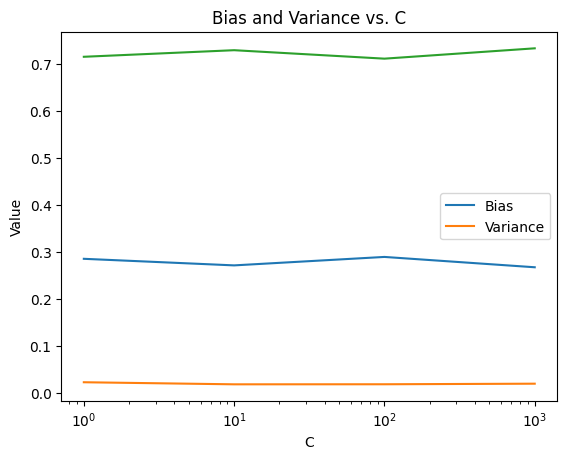

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from ISLP.svm import plot as plot_svm
import matplotlib.pyplot as plt
from matplotlib import cm

# C 값 리스트
C_values = [1, 10, 100, 1000,]

# 결과 저장을 위한 리스트
biases = []
variances = []
accuracies = []

# 각 C 값에 대한 반복
for C in C_values:
    # 100번 반복하여 bias와 variance 계산
    temp_accuracies = []
    for i in range(100):
        # 데이터셋 분할
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        # 모델 학습
        svm_linear = SVC(C=C, kernel='linear')
        svm_linear.fit(X_train, y_train)

        # 예측 및 평가
        y_pred = svm_linear.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        temp_accuracies.append(accuracy)

    # bias, variance, accuracy 계산
    avg_accuracy = np.mean(temp_accuracies)
    bias = 1 - avg_accuracy
    variance = np.var(temp_accuracies)

    biases.append(bias)
    variances.append(variance)
    accuracies.append(avg_accuracy)

    # 시각화
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_svm(X_train, y_train, svm_linear, ax=ax)
    plt.title(f'C = {C}')
    plt.show()

# 결과 출력
for i in range(len(C_values)):
    print(f'C = {C_values[i]:.1f}: Bias = {biases[i]:.4f}, Variance = {variances[i]:.4f}, Accuracy = {accuracies[i]:.4f}')

# bias와 variance 시각화
plt.plot(C_values, biases, label='Bias')
plt.plot(C_values, variances, label='Variance')
plt.plot(C_values, accuracies)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Value')
plt.title('Bias and Variance vs. C')
plt.legend()
plt.show()

### CV로 초매개변수 최적화를 진행

In [9]:
# 5-fold 교차 검증을 위한 KFold 객체를 생성합니다.
# random_state는 셔플을 위한 시드값을 지정하고, shuffle=True는 데이터를 셔플하여 폴드를 나눕니다.
kfold = skm.KFold(5, random_state=0, shuffle=True)

# GridSearchCV 객체를 생성합니다.
# svm_linear는 사용할 모델, {'C':[0.001,0.01,0.1,1,5,10,100]}는 탐색할 매개변수 그리드를 지정합니다.
# refit=True는 가장 좋은 매개변수를 사용하여 전체 데이터셋에 모델을 다시 학습시키도록 합니다.
# cv는 교차 검증 방법을 지정하고, scoring은 모델 평가 지표를 지정합니다.
grid = skm.GridSearchCV(svm_linear, {'C':[0.001,0.01,0.1,1,5,10,100]}, refit=True, cv=kfold, scoring='accuracy')

# GridSearchCV를 사용하여 데이터 X와 레이블 y에 대해 최적의 매개변수를 찾습니다.
grid.fit(X, y)
grid.best_params_
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

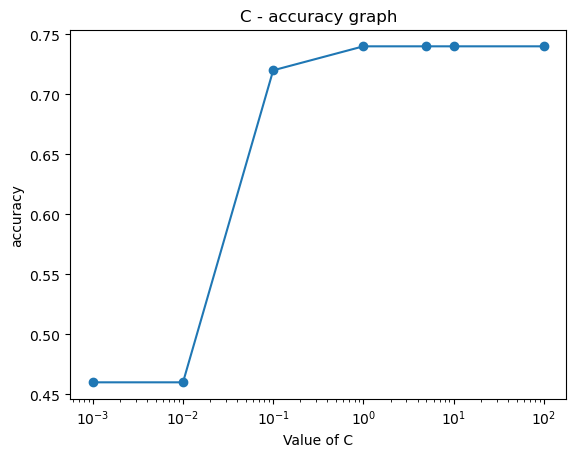

In [10]:
# 주어진 결과와 C 값 목록
results = grid.cv_results_[('mean_test_score')]
C_values = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# C 값에 따른 정확도 변화를 시각화
plt.plot(C_values, results, marker='o')
plt.xscale('log')  # x축을 로그 스케일로 설정
plt.xlabel('Value of C')
plt.ylabel('accuracy')
plt.title('C - accuracy graph')
plt.show()

### 평가데이터에서 예측성능은 어떨까?

In [11]:
rng = np.random.default_rng(1)
X_test = rng.standard_normal((500, 2))  # 500개의 데이터 포인트 생성
y_test = np.array([-1]*200+[1]*300)  # 200개의 -1, 300개의 1 레이블 생성
X_test[y_test==1] += 1  # y_test가 1인 데이터 포인트의 X좌표값에 1을 더함

# GridSearchCV에서 찾은 최적의 모델을 사용합니다.
best_ = grid.best_estimator_

# 최적의 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행합니다.
y_test_hat = best_.predict(X_test)

# confusion_table 함수를 사용하여 혼동 행렬을 출력합니다.
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,165,80
1,35,220


### 아니 저게 최적이 맞나?
* 만약에 최적화된 C를 사용하지 않은 경우

In [12]:
# C=0.001을 사용하는 SVM 모델 생성 및 학습
svm_ = SVC(C=0.001, kernel='linear').fit(X, y)

# 테스트 데이터셋에 대한 예측
y_test_hat = svm_.predict(X_test)

# 혼동 행렬 출력
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,75,11
1,125,289


## 완벽하게 분리되는 경우

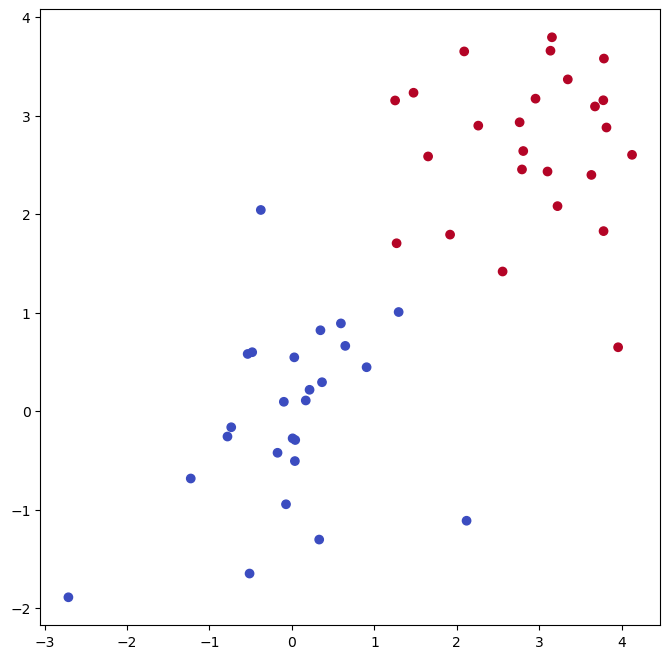

In [13]:
# y가 1인 데이터 포인트의 X좌표값에 1.9를 더합니다.
# 이는 두 그룹의 데이터 포인트를 시각적으로 더 분리하기 위해 X축 방향으로 이동시키는 것입니다.
# 이전 코드에서는 1을 더했지만, 이번에는 1.9를 더하여 두 그룹 사이의 간격을 더 넓힙니다.
X[y==1] += 1.9

# 그림과 축을 생성합니다. figsize는 그림의 크기를 지정합니다.
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [14]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)
# perfect fitting !!

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


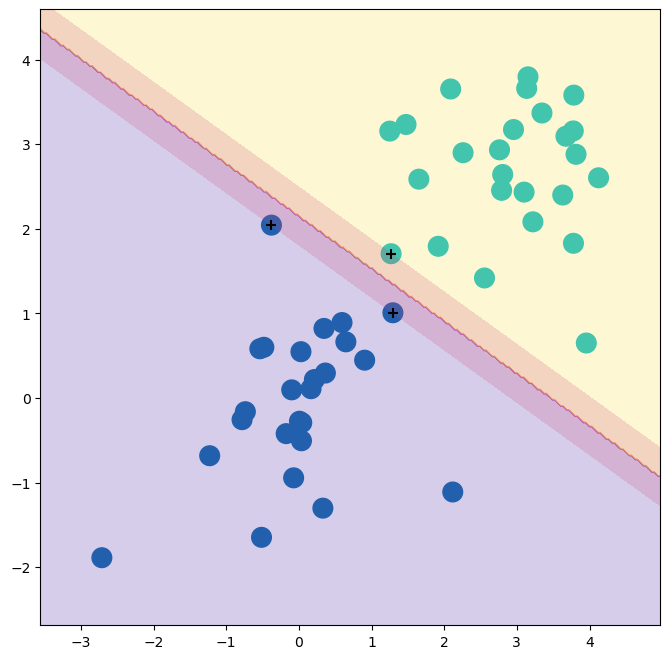

In [15]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X, y, svm_ , ax=ax)

In [ ]:
# svm_ 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행합니다.
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,198,193
1,2,107


## SVM (비선형 경계)
* 선형이는 떠나갔습니다.




이번엔 비선형 경계에 대해서 분류기를 만들어보겠습니다...!


In [16]:
rng = np.random.default_rng(1)
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

첫 번째 그룹 (100개): 평균이 0이고 표준편차가 1인 정규분포를 따르는 랜덤 넘버를 생성하고, 각 좌표값에 2를 더합니다. 즉, 이 그룹의 데이터 포인트는 (2, 2)를 중심으로 분포합니다.   
두 번째 그룹 (50개): 평균이 0이고 표준편차가 1인 정규분포를 따르는 랜덤 넘버를 생성하고, 각 좌표값에 2를 뺍니다. 즉, 이 그룹의 데이터 포인트는 (-2, -2)를 중심으로 분포합니다.   
세 번째 그룹 (50개): 평균이 0이고 표준편차가 1인 정규분포를 따르는 랜덤 넘버를 생성합니다. 즉, 이 그룹의 데이터 포인트는 (0, 0)을 중심으로 분포합니다.  

근데 레이블은 두 개임 ㅋ

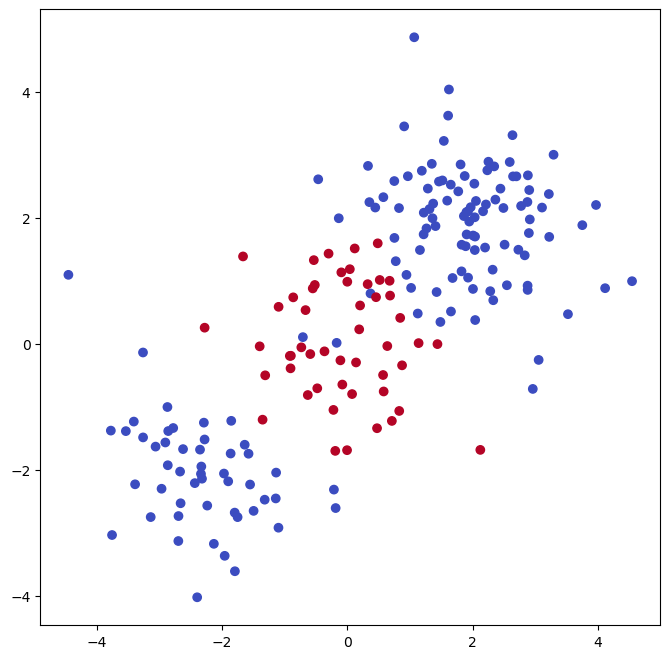

In [17]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],X[:,1],c=y, cmap=cm.coolwarm)

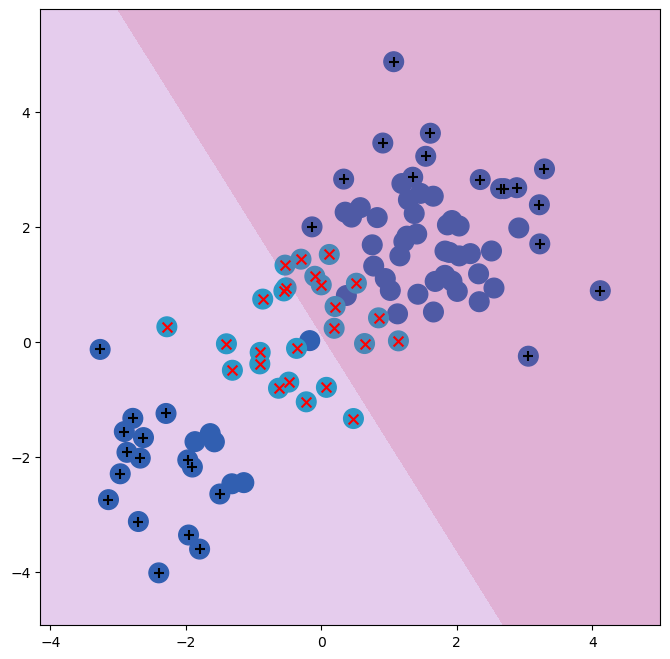

In [18]:
# train_test_split 함수를 사용하여 데이터를 훈련 세트와 테스트 세트로 나눕니다.
# random_state=0는 데이터를 나눌 때 랜덤성을 제어하기 위해 시드값을 설정합니다.
(X_train, X_test ,y_train, y_test) = skm.train_test_split(X, y, test_size=0.5, random_state=0)
svm_lili = SVC(kernel="linear", C=10)


# 생성한 SVM 모델을 훈련 데이터 X_train과 y_train을 사용하여 학습시킵니다.
svm_lili.fit(X_train, y_train)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train , svm_lili , ax=ax)

방금까지는 선 하나 지익 그으면 분류기를 어떻게든 만들었을텐데,.. 지금은 어떤가요?

In [19]:
# train_test_split 함수를 사용하여 데이터를 훈련 세트와 테스트 세트로 나눕니다.
# random_state=0는 데이터를 나눌 때 랜덤성을 제어하기 위해 시드값을 설정합니다.
(X_train, X_test ,y_train, y_test) = skm.train_test_split(X, y, test_size=0.5, random_state=0)

# RBF 커널을 사용하는 SVM 모델을 생성합니다.
# gamma는 RBF 커널의 폭을 제어하는 매개변수입니다.
# C는 규제 매개변수입니다.
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)

# 생성한 SVM 모델을 훈련 데이터 X_train과 y_train을 사용하여 학습시킵니다.
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

* sklearn.svm.SVC 클래스는 SVM 모델을 생성하는 데 사용.
* kernel="rbf"는 RBF 커널을 사용한다는 의미.
    * RBF 커널은 비선형 결정 경계를 모델링할 수 있는 커널.
    * gamma=1은 RBF 커널의 폭을 제어하는 매개변수.
    * gamma 값이 클수록 결정 경계가 더 복잡해짐.
    * C=1은 규제 매개변수.
    * C 값이 클수록 오분류를 허용하지 않으려는 경향이 강해짐.

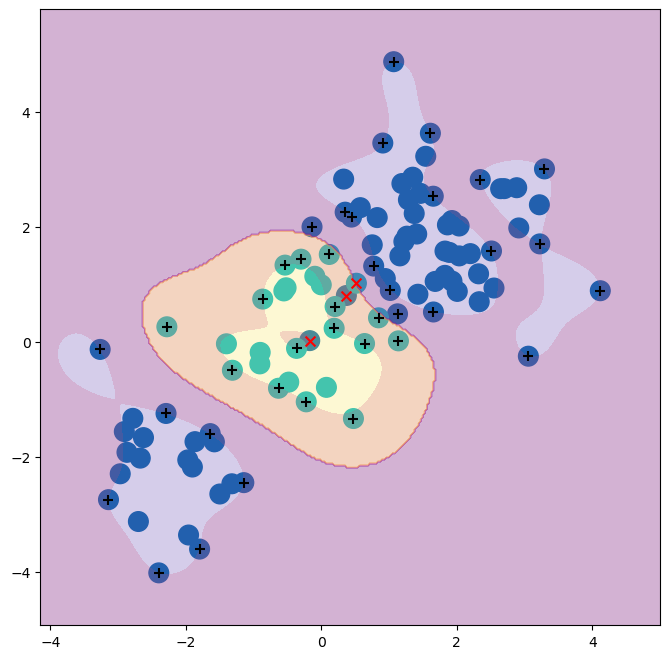

In [20]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train , svm_rbf , ax=ax)

##### - C값의 변화에 따라 서포트 벡터와 경계가 달라짐

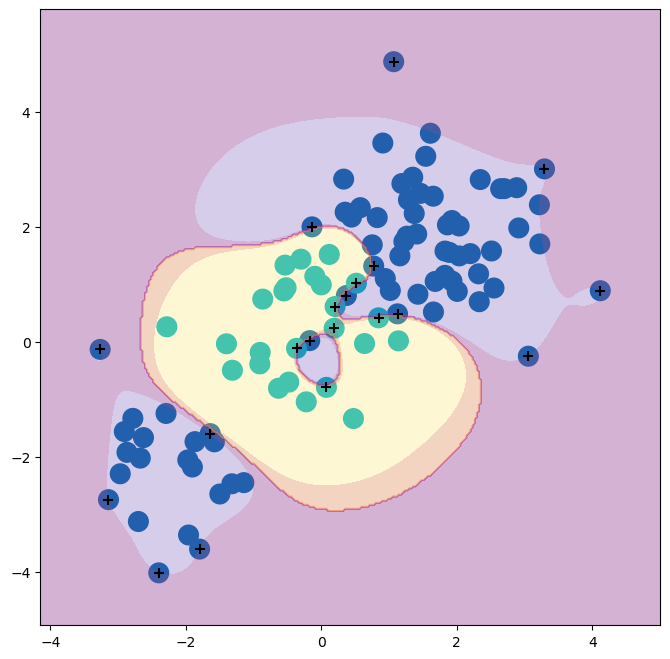

In [21]:
# 매우 큰 값(1e5)을 사용해보자.
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train , svm_rbf , ax=ax)

##### - CV 로 최적의 초매개변수 파악

In [ ]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.5,1,2,3,4]}, # 탐색할 매개변수 그리드를 지정
                        refit=True, # refit=True는 가장 좋은 매개변수를 사용하여 전체 데이터셋에 모델을 다시 학습시키도록 합니다.
                        cv=kfold, # cv는 교차 검증 방법을 지정하고,
                        scoring='accuracy'); # scoring은 모델 평가 지표를 지정합니다.
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 1}

KFold에서 폴드 수를 5에서 10으로 늘리면 교차 검증 과정에서 모델이 훈련되고 평가되는 횟수가 증가하는데...
* 이는 더 많은 데이터를 사용하여 모델을 평가하기 때문에 일반적으로 더 안정적이고 정확한 성능 추정치를 얻을 수 있음.
* 그러나 당연하게도 계산 비용이 증가하는 단점이 있음

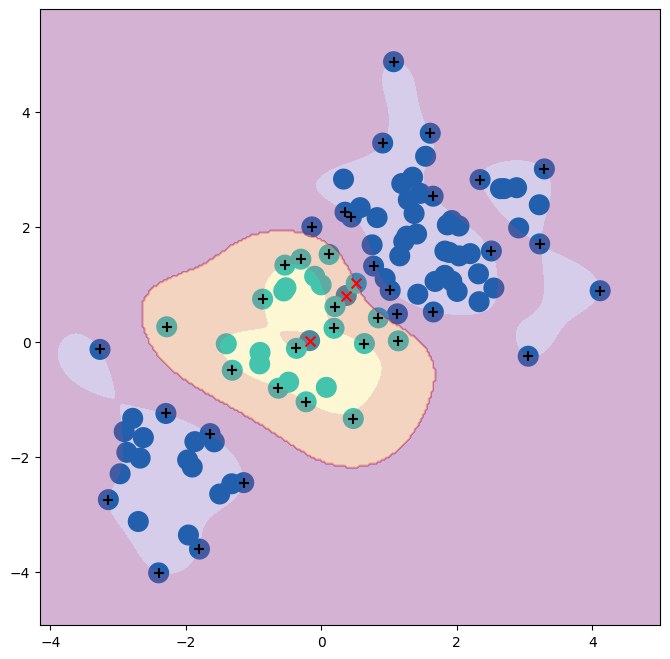

Truth,1,2
Predicted,,
1,74,5
2,1,20


In [ ]:
# GridSearchCV에서 찾은 최적의 모델을 가져옵니다.
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train, best_svm, ax=ax)
plt.show()

# 최적의 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행합니다.
y_hat_test = best_svm.predict(X_test)

# confusion_table 함수를 사용하여 혼동 행렬을 출력합니다.
confusion_table(y_hat_test, y_test)

- SVM ROC: 경계와 거리 값을 이용함에 유의

##### - CV 에서 최적의 선택인 경우 훈련데이터에서의 ROC

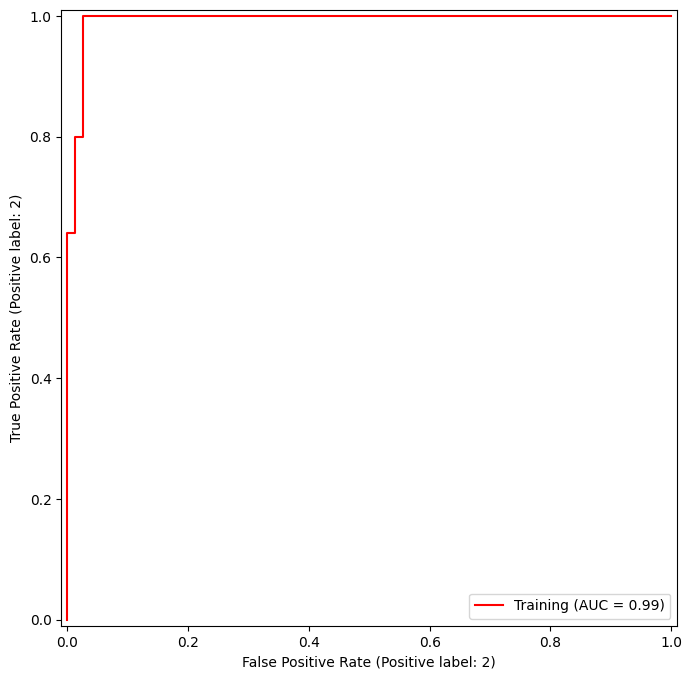

In [ ]:
fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm, X_train , y_train , name='Training', color='r', ax=ax);

##### - CV 에서 최적은 아니어도 훈련데이터에서 ROC가 좋을 수 있음

gamma 값을 50으로 설정한 SVM 모델을 훈련 데이터셋에 학습시키고, ROC 곡선을 그려 훈련 데이터에서의 성능을 확인해보겠음.

* 훈련 데이터에서의 ROC 곡선은 모델이 훈련 데이터를 완벽하게 분류하는 것을 보여주는 걸 알 수 있는데...
* 그 아래 코드결과를 보면 gamma=50인 경우 결정 경계가 매우 복잡함. 과적합 될 가능성이 높아짐.
* 이 과적합 될 가능성 때문에 최적의 gamma 값으로 선택되지 않을 가능성이 있음.

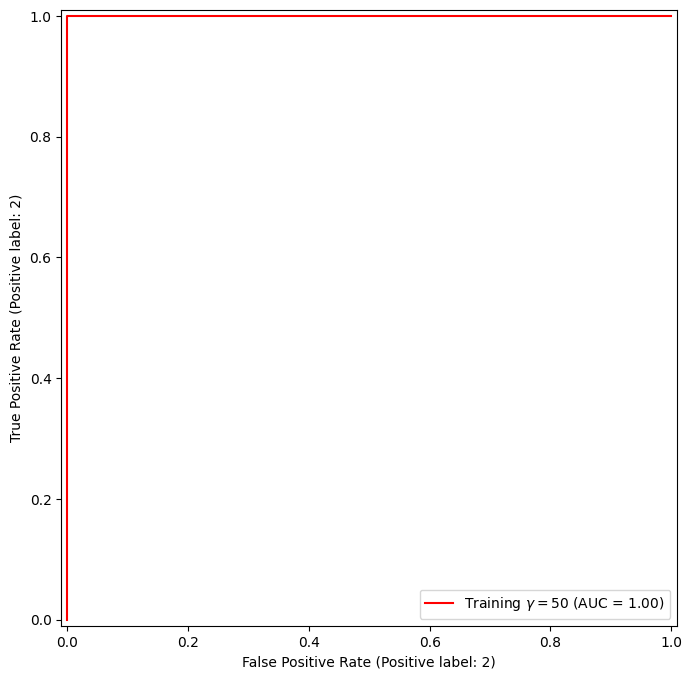

In [ ]:
# SVC 함수를 사용하여 gamma 값을 50으로 설정한 SVM 모델을 생성하고, 훈련 데이터셋에 학습시킵니다.
svm_flex = SVC(kernel="rbf", gamma=50, C=1)
svm_flex.fit(X_train, y_train)

fig, ax = subplots(figsize=(8,8))
roc_curve(svm_flex, X_train , y_train , name='Training $\gamma=50$', color='r', ax=ax);

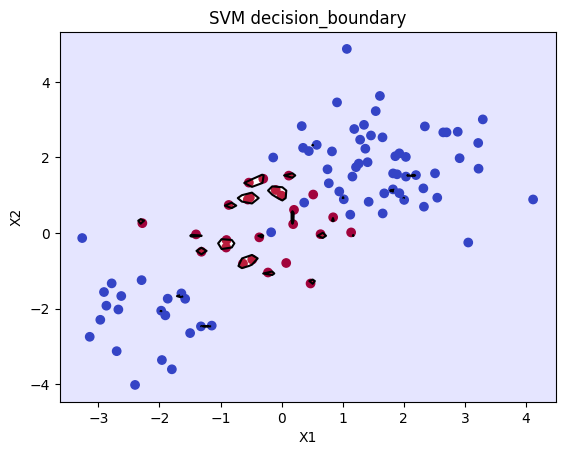

In [ ]:
# matplotlib.pyplot 라이브러리를 사용하여 훈련 데이터셋에서의 결정 경계를 시각화합니다.
# plot_svm 함수 대신 matplotlib.pyplot 라이브러리를 사용하여 결정 경계를 직접 그립니다.
def plot_svm_decision_boundary(svm_model, X, y):
    # 먼저 matplotlib.pyplot.scatter를 사용하여 데이터 포인트를 그립니다.
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    # 그런 다음, meshgrid를 사용하여 결정 경계를 그릴 영역을 생성합니다.
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))

    # 만들어진 영역에 대해 모델의 예측값을 계산합니다.
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # contour 함수를 사용하여 결정 경계를 그립니다.
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=1,
               linestyles=['--', '-', '--'])

    # 마진에 해당하는 영역을 표시합니다.
    ax.contourf(xx, yy, Z, colors=['blue', 'white', 'red'], alpha=0.1,
               levels=[-1, 0, 1])

    # 그래프의 제목을 설정하고, x축과 y축 레이블을 지정합니다.
    plt.title("SVM decision_boundary")
    plt.xlabel("X1")
    plt.ylabel("X2")

    # 그래프를 출력합니다.
    plt.show()

# 훈련 데이터셋에서의 결정 경계를 시각화합니다.
plot_svm_decision_boundary(svm_flex, X_train, y_train)

##### -  평가데이터에서 ROC 그려봄 (CV 선택)

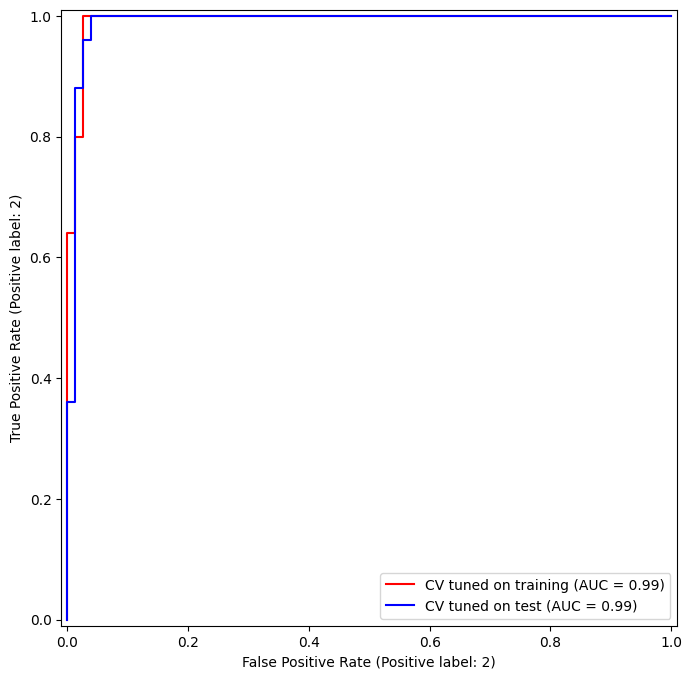

In [ ]:
roc_curve(svm_flex, X_test , y_test, name='Test $\gamma=50$', color='b', ax=ax)
fig, ax = subplots(figsize=(8,8))

# zip 함수를 사용하여 데이터셋, 색상, 이름을 묶습니다.
for (X_, y_, c, name) in zip((X_train, X_test), (y_train, y_test), ('r', 'b'), ('CV tuned on training', 'CV tuned on test')):
    roc_curve(best_svm, X_, y_, name=name, ax=ax, color=c)

- 다중분류

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


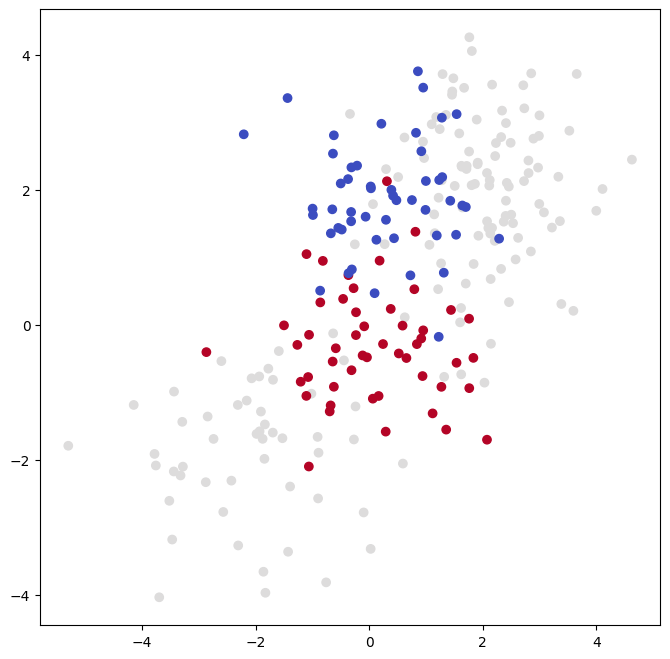

In [ ]:
# 평균이 0이고 표준편차가 1인 정규분포를 따르는 랜덤넘버 200개를 생성하여 2개의 열을 가진 배열 X를 만듭니다.
X = rng.standard_normal((200, 2))

# X의 첫 100개 데이터 포인트의 좌표값에 2를 더합니다.
X[:100] += 2

# X의 100번째부터 149번째까지의 데이터 포인트의 좌표값에 2를 뺍니다.
X[100:150] -= 2

# 150개의 1과 50개의 2로 이루어진 배열 y를 만듭니다.
y = np.array([1]*150+[2]*50)

rng = np.random.default_rng(123)

# 평균이 0이고 표준편차가 1인 정규분포를 따르는 랜덤넘버 50개를 생성하여 X에 추가합니다.
X = np.vstack([X, rng.standard_normal((50, 2))])

# y에 50개의 0을 추가합니다.
y = np.hstack([y, [0]*50])
print(y)

# y가 0인 데이터 포인트의 y좌표값에 2를 더합니다.
X[y==0,1] += 2

fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

위 그림은 기존의 세 그룹에 새로운 그룹을 추가하여 총 네 개의 그룹으로 이루어진 데이터셋을 생성해본거임
* 첫 번째 그룹 (100개): 평균이 (2, 0)이고 표준편차가 1인 정규분포를 따름.
* 두 번째 그룹 (50개): 평균이 (-2, 0)이고 표준편차가 1인 정규분포를 따름.
* 세 번째 그룹 (50개): 평균이 (0, 0)이고 표준편차가 1인 정규분포를 따름.
* 네 번째 그룹 (50개): 평균이 (0, 2)이고 표준편차가 1인 정규분포를 따름.

사실 4개의 그룹으로 구분되어야 정상인데, 레이블은 3개임...  홀리 몰리


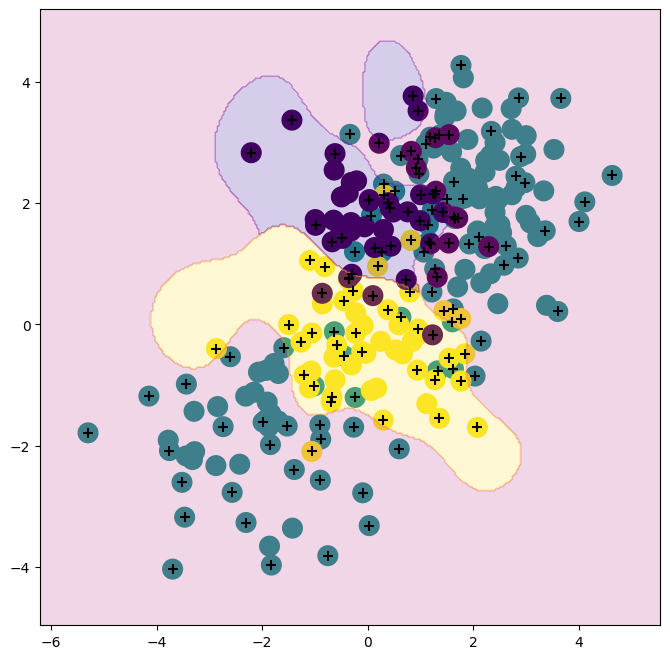

In [ ]:
# RBF 커널을 사용하는 SVM 모델을 생성.
# C는 규제 매개변수, gamma는 RBF 커널의 폭을 제어하는 매개변수.
# decision_function_shape='ovo'는 One-vs-One 방식으로 다중 클래스 분류를 수행하게 해줌.
svm_rbf_3 = SVC(kernel="rbf", C=10, gamma=1, decision_function_shape='ovo');
svm_rbf_3.fit(X, y)

fig, ax = subplots(figsize=(8,8))
plot_svm(X, y,svm_rbf_3 , scatter_cmap=cm.viridis, ax=ax)

# one-vs-one??
# One-vs-One 방식은 다중 클래스 분류 문제를 여러 개의 이진 분류 문제로 나누어 해결하는 방법.
# 각 클래스 쌍에 대해 이진 분류기를 생성하고, 새로운 데이터 포인트에 대해 각 분류기의 예측 결과를 종합하여 최종 클래스를 결정함.

- 예제: Gene Expression Data

아래 코드는
1. ISLP 라이브러리에서 Khan 데이터셋을 불러와서,
2. 훈련 데이터(xtrain)와 테스트 데이터(xtest)의 shape을 출력하는 코드임.

설명   
Khan 데이터셋은 유전자 발현 데이터를 기반으로 4가지 종류의 소형 원형 청색 세포 종양을 분류하는 데 사용됨.

xtrain: 63명의 환자에 대한 2308개 유전자의 발현 값을 포함하는 훈련 데이터.   
xtest: 20명의 환자에 대한 2308개 유전자의 발현 값을 포함하는 테스트 데이터.   
따라서 Khan['xtrain'].shape은 (63, 2308)이고, Khan['xtest'].shape은 (20, 2308)입니다.

즉, 훈련 데이터는 63개의 행(샘플)과 2308개의 열(특징)을 가지고, 테스트 데이터는 20개의 행(샘플)과 2308개의 열(특징)을 가진 데이터..

In [ ]:
# ISLP 라이브러리에서 Khan 데이터셋을 불러옵니다.
Khan = load_data('Khan')

# Khan 데이터셋의 xtrain과 xtest의 shape을 출력합니다.
print(Khan['xtrain'].shape, Khan['xtest'].shape)

(63, 2308) (20, 2308)


In [ ]:
# 선형 커널을 사용하는 SVM 모델을 생성. C는 규제 매개변수
khan_linear = SVC(kernel='linear', C=10)

# 훈련 데이터를 사용하여 모델을 학습.
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])

# 훈련 데이터에 대한 예측을 수행하고 혼동 행렬을 출력.
confusion_table(khan_linear.predict(Khan['xtrain']), Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


혼동 행렬의 모든 값이 대각선에 위치하는 것을 볼 수 있음.
* 이는 훈련 데이터에 대해 모델이 완벽하게 예측했음을 의미.
* 이는 훈련 데이터에 과적합되었을 가능성이 높다는 것을 의미할 수도 있다는 것.
* 따라서 테스트 데이터에 대한 모델의 성능을 평가하여 일반화 성능을 확인해야 함


In [ ]:
# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = khan_linear.predict(Khan['xtest'])

In [ ]:
confusion_table(Khan['ytest'], y_pred)

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,0,0
3,0,2,4,0
4,0,0,0,5


In [ ]:
khan_rbf = SVC(kernel='rbf', C=10000)

# 훈련 데이터를 사용하여 모델을 학습.
khan_rbf.fit(Khan['xtrain'], Khan['ytrain'])

# 훈련 데이터에 대한 예측을 수행하고 혼동 행렬을 출력.
confusion_table(khan_rbf.predict(Khan['xtrain']), Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [ ]:
# 테스트 데이터에 대한 예측을 수행합니다.
y_pred_rbf = khan_rbf.predict(Khan['xtest'])
confusion_table(Khan['ytest'], y_pred_rbf)

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,0,0
3,0,3,2,1
4,0,0,0,5


In [ ]:
khan_poly = SVC(kernel='poly', C=10)

# 훈련 데이터를 사용하여 모델을 학습.
khan_poly.fit(Khan['xtrain'], Khan['ytrain'])

# 훈련 데이터에 대한 예측을 수행하고 혼동 행렬을 출력.
confusion_table(khan_poly.predict(Khan['xtrain']), Khan['ytrain'])

# 테스트 데이터에 대한 예측을 수행합니다.
y_pred_poly = khan_poly.predict(Khan['xtest'])
confusion_table(Khan['ytest'], y_pred_poly)

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,0,0
3,0,2,4,0
4,0,0,0,5


In [ ]:
# Khan 데이터셋 불러오기
Khan = load_data('Khan')
X_train = Khan['xtrain']
y_train = Khan['ytrain']
X_test = Khan['xtest']
y_test = Khan['ytest']

# SVM 모델 객체 생성
svm = SVC()


# 탐색할 매개변수 그리드 설정
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1, 10, 100],
    'gamma': [0.1, 1, 2, 3, 5,10, 'scale', 'auto']
}

# KFold 객체 생성 (5-fold cross-validation)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=kfold, scoring='accuracy')

# GridSearchCV 수행 (X_train과 y_train은 훈련 데이터)
grid_search.fit(X_train, y_train)

# 최적의 매개변수 조합 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델 출력
best_svm = grid_search.best_estimator_

confusion_table(y_test, y_pred)

Best parameters found:  {'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}


Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,0,0
3,0,2,4,0
4,0,0,0,5


## 보기만 하셔도 됩니다.

In [ ]:
from ISLP import  confusion_table
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_wine

In [ ]:
# 와인 데이터셋 로드
wine = load_wine()
X, y = wine.data, wine.target

# 훈련 데이터와 테스트 데이터 분할 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM 모델 생성 및 훈련
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = svm_model.predict(X_test)

In [ ]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# 결과 출력
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 1.0000
Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
# GridSearchCV를 사용한 매개변수 튜닝
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# 최적의 매개변수 조합 출력
print("Best parameters found: ", grid.best_params_)

# 최적의 모델로 예측 및 평가
grid_predictions = grid.predict(X_test)
print("Accuracy:", accuracy_score(y_test, grid_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, grid_predictions))
print("Classification Report:\n", classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

In [ ]:
# 유방암 데이터
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 불러오기
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 데이터 분할 (훈련 데이터 70%, 테스트 데이터 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM 모델 생성 및 훈련
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# 테스트 데이터 예측
y_pred = svm_model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# GridSearchCV를 사용한 매개변수 튜닝
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid.best_params_)

# 최적의 모델로 예측 및 평가
grid_predictions = grid.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, grid_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, grid_predictions))
print("Classification Report:\n", classification_report(y_test, grid_predictions))

Accuracy: 0.9766
Confusion Matrix:
 [[ 61   2]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, g

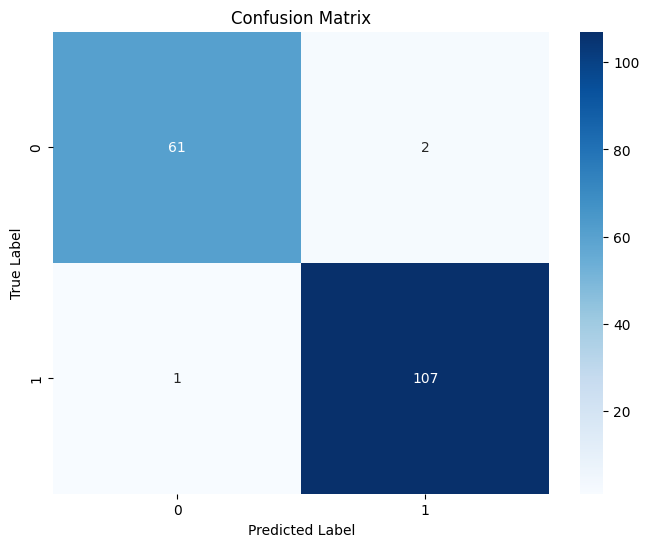

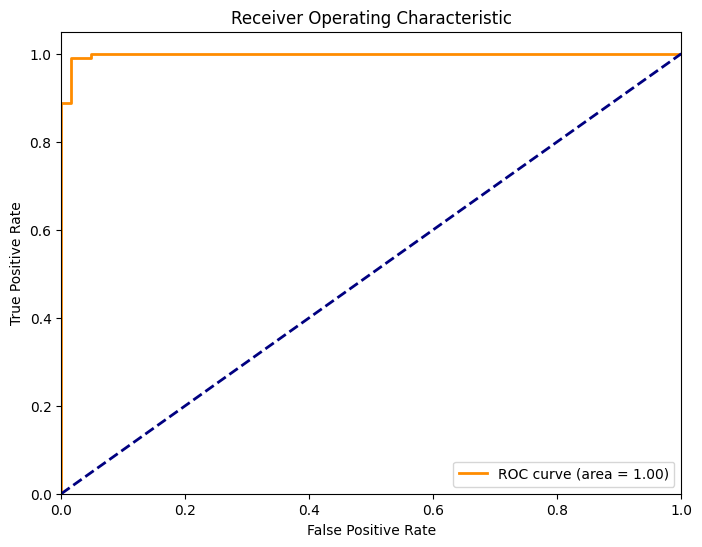

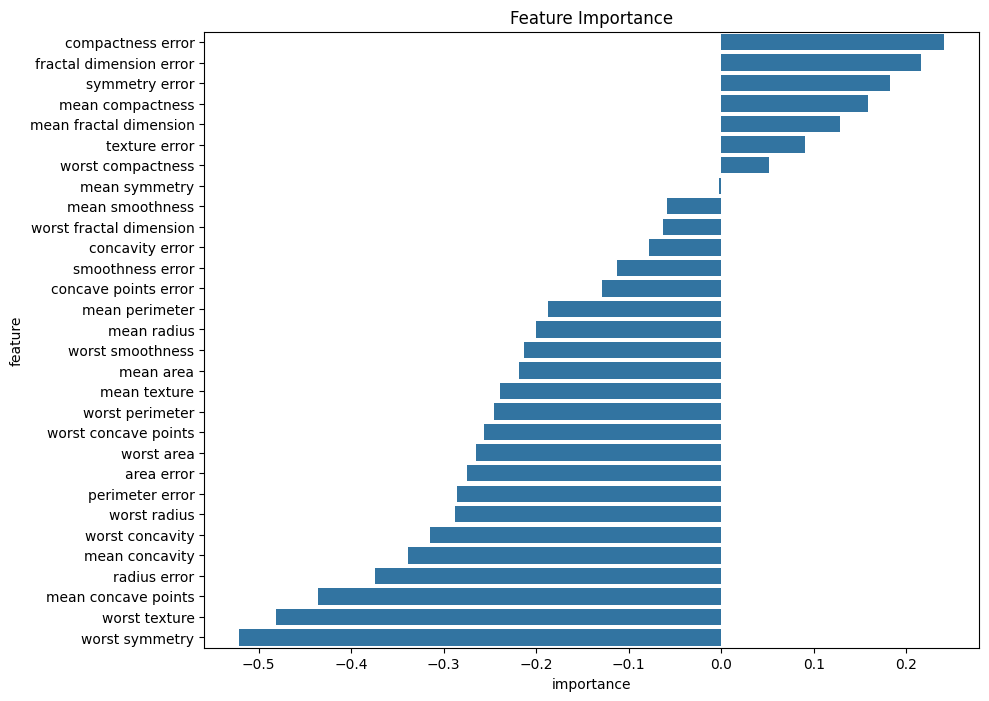

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
# 1. 혼동 행렬 시각화
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. ROC 곡선 시각화
fpr, tpr, thresholds = roc_curve(y_test, grid.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 3. 특성 중요도 시각화 (선형 커널의 경우에만 가능)
if grid.best_params_['kernel'] == 'linear':
    coef = grid.best_estimator_.coef_.ravel()
    feature_importance = pd.DataFrame({'feature': data.feature_names, 'importance': coef})
    feature_importance = feature_importance.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title("Feature Importance")
    plt.show()

이쯤하고, 클러스터링을 시작해보겠습니다.

# 클러스터링 ㅋ

# 전달사항

1. 다음 시험 퀴즈 범위는 ~ SVM 까지

2. 군집분석 참고자료
* 언제 올리실지는 모름
* 참고자료를 LMS에 올리니까 참고해서 일단 보라고 하심

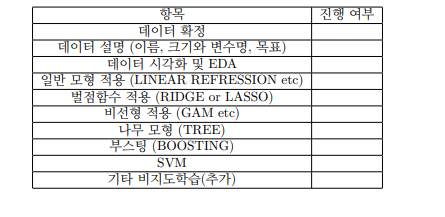

3. 기말과제 관련
* 일단 저 체크리스트 중 SVM까지는 다 채워야 함.
* 제가 그래서 용기내서 알고리즘 하나만 해봐도 되는거 아니냐? 여쭤봤는데
  * "점수가 그럼... 흠..." 하셨습니다. 다 하세요...
* 저 체크리스트가 보고서의 목차가 되어야 함.(전부 포함시키세요.)
* 코드 중 사용되었던 CV(cross validation)이용해서 파라미터 최적화하는 과정도 포함되어 있어야 함.

4. 포스터 이미지
* data 관련 설명(관련 지식, 간단한 시각화, 전처리가 필요한 데이터였다면 전처리 방식 조금 설명)
* 각 알고리즘에 대해서 돌려보고 test error가 어떻게 나왔다 첨부
* 나열식 XXXXXXXXXXXXXXXXXXXXXXXX
* 테스트 결과들을 비교하기 쉽게 플랏으로 구성하면 좋을거다.(그림 2~3개)
* 보여주고 싶은 데이터 특징(통계량), 해보고 싶은 실험해서 결과 보여주면 된다.

예시)
* 릿지 라쏘 결과 비교
* 리니어 vs rbf 등등

* 그동안 제 학부기간동안의 김광수 교수님의 과제를 봤을 때
  * 참신한 그래프(gpt가 그려주는건 참신하지 않슴다...) 재밌어 하심
  * 참신한 데이터(+ 그에 걸맞는 설명) 좋아하

기계학습  퀴즈 재공지
* 12월 19일 11시~ 11시 15분: 15분간 시험, 지각하셔도 추가 시간 분배 안될 가능성 높아용
* 자연대학교 본관 2층 226, 221 나눠서 시험


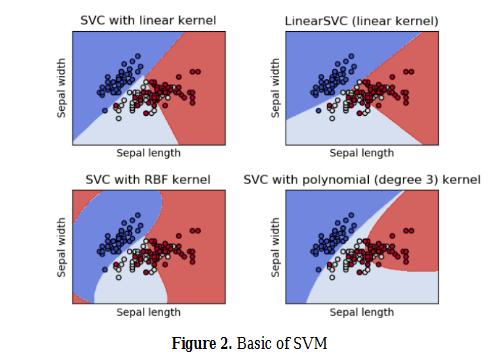

Hayder Hasan et al 2019 IOP Conf. Ser.: Earth Environ. Sci. 357 012035

![image.png](attachment:fe0288ce-97d3-4302-bb81-95c746643e6d.png)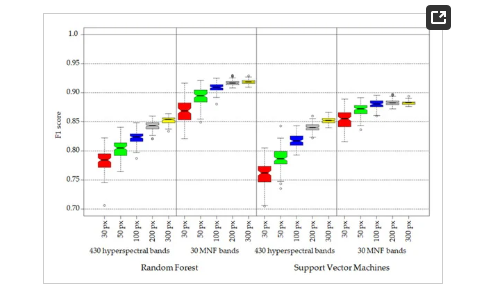

Sabat-Tomala, A.; Raczko, E.; Zagajewski, B. Comparison of Support Vector Machine and Random Forest Algorithms for Invasive and Expansive Species Classification Using Airborne Hyperspectral Data. Remote Sens. 2020, 12, 516. https://doi.org/10.3390/rs1203051

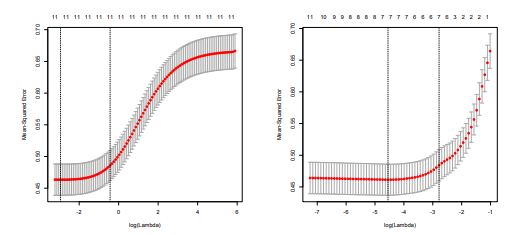

https://doi.org/10.1016/j.proeng.2017.09.615